## Imports et chargement des données


In [9]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

# Charge les données depuis un fichier CSV par exemple
data = pd.read_csv('/content/drive/MyDrive/M2 SIAD/MLOps/Projet/mail.csv' ,sep =";")

# Vérifie la structure des données
print(data.head())


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
   Column1 label                                               text  label_num
0      605   ham  Subject: enron methanol ; meter # : 988291\r\n...          0
1     2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2     3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3     4685  spam  Subject: photoshop , windows , office . cheap ...          1
4     2030   ham  Subject: re : indian springs\r\nthis deal is t...          0


import pandas as pd

# Charge les données depuis un fichier CSV par exemple
data = pd.read_csv('C:/Users/moham/Desktop/Projet_Mlops/mail.csv' ,sep =";")

# Vérifie la structure des données
print(data.head())

## Prétraitement des données


In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



def clean_text(text):
    """
    Nettoie le texte des e-mails en le mettant en minuscules, en supprimant la ponctuation, les chiffres et les mots vides.

    Args:
    text (str): Texte à nettoyer, représentant un e-mail.

    Returns:
    str: Texte nettoyé (en minuscules, sans ponctuation, ni chiffres, sans mots vides).
    """
    # Supprime "Subject:" du texte
    text = re.sub(r'Subject:', '', text)

    # Convertit en minuscules, supprime la ponctuation, les chiffres et les mots vides
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenisation du texte en mots
    tokens = word_tokenize(text)
    
    # Suppression des mots vides de la langue anglaise
    cleaned_text = ' '.join([word for word in tokens if word not in stopwords.words('english')])
    
    return cleaned_text

# Appliquer la fonction de nettoyage à la colonne 'text'
data['cleaned_text'] = data['text'].apply(clean_text)

"""
la fonction clean_text nettoie le texte des emails en le mettant en minuscules, en supprimant la ponctuation, les chiffres et les mots vides.

"""

data['cleaned_text'] = data['text'].apply(clean_text)
#le ham est un courrier que l'on désire recevoi


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
data['cleaned_text']

0       enron methanol meter follow note gave monday p...
1       hpl nom january see attached file hplnol xls h...
2       neon retreat ho ho ho around wonderful time ye...
3       photoshop windows office cheap main trending a...
4       indian springs deal book teco pvr revenue unde...
                              ...                        
5166    put ft transport volumes decreased contract th...
5167    following noms hpl take extra mmcf weekend try...
5168    calpine daily gas nomination julie mention ear...
5169    industrial worksheets august activity attached...
5170    important online banking alert dear valued cit...
Name: cleaned_text, Length: 5171, dtype: object

## Visualisation de la distribution des labels (spam/non-spam)


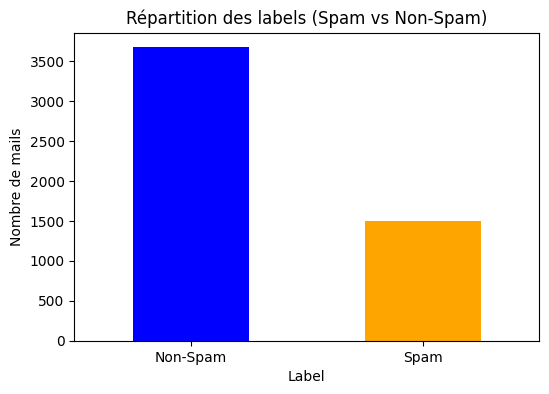

In [18]:
import matplotlib.pyplot as plt

# Compte le nombre de chaque label
label_counts = data['label'].value_counts()
# Crée un diagramme en barres pour visualiser la répartition des labels
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Répartition des labels (Spam vs Non-Spam)')
plt.xlabel('Label')
plt.ylabel('Nombre de mails')
plt.xticks(rotation=0)  # Rotation des étiquettes sur l'axe des x
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'])  # Définition des positions des ticks et de leurs étiquettes
plt.show()



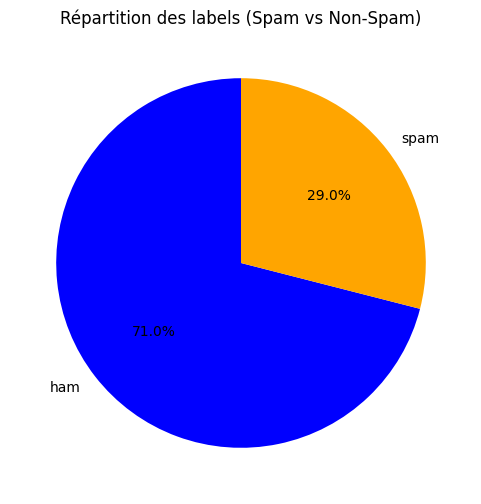

In [19]:
import matplotlib.pyplot as plt

# Compte le nombre de chaque label
label_counts = data['label'].value_counts()

# Calcul des pourcentages pour chaque label
labels = label_counts.index.tolist()
total = label_counts.sum()
percentages = [(count / total) * 100 for count in label_counts]

# Crée un diagramme circulaire pour visualiser la répartition des labels
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Répartition des labels (Spam vs Non-Spam)')
plt.show()


## Visualisation des mots les plus fréquents


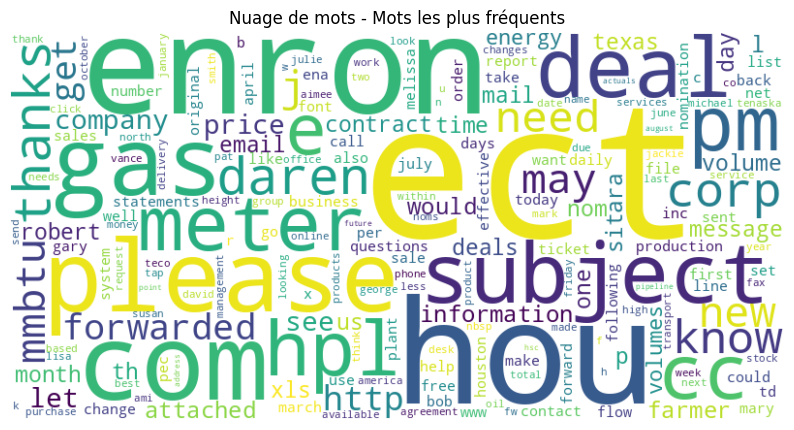

In [20]:
from collections import Counter
from wordcloud import WordCloud

# Concatène tous les textes pour créer un corpus
corpus = ' '.join(data['cleaned_text'])

# Compte la fréquence des mots
word_freq = Counter(corpus.split())

# Crée un nuage de mots pour visualiser les mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots - Mots les plus fréquents')
plt.show()


**Modélisation**

In [23]:
# Divise les données en ensembles d'entraînement et de test


X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42, stratify=data['label'])


# Vectorisation du texte
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

"""
La division des données en ensembles d'entraînement et de test se fait avec train_test_split.
La vectorisation du texte est effectuée avec TfidfVectorizer pour transformer le texte en une représentation numérique utilisable pour l'entraînement du modèle.
"""

"\nLa division des données en ensembles d'entraînement et de test se fait avec train_test_split.\nLa vectorisation du texte est effectuée avec TfidfVectorizer pour transformer le texte en une représentation numérique utilisable pour l'entraînement du modèle.\n"

## Entraînement du modèle


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Création et entraînement du modèle SVM
model = SVC(kernel='linear')
model.fit(X_train_vectorized, y_train)

# Prédiction sur l'ensemble de test
predictions = model.predict(X_test_vectorized)

# Évaluation du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))


Accuracy: 0.9893719806763285
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       735
        spam       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



## Évaluation du modèle et rapport de performance


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédiction sur l'ensemble de test
predictions = model.predict(X_test_vectorized)

# Génère un rapport de classification
report = classification_report(y_test, predictions)

# Affiche le rapport de classification
print("Rapport de classification :")
print(report)

# Génère et affiche la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)
print("\nMatrice de confusion :")
print(conf_matrix)


Rapport de classification :
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       735
        spam       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035


Matrice de confusion :
[[727   8]
 [  3 297]]


In [26]:
# Nettoyage et vectorisation des données
cleaned_messages = data['text'].apply(clean_text)
X_vectorized = vectorizer.transform(cleaned_messages)
# Entraînement du modèle
model.fit(X_vectorized, data['label'])


SVC(kernel='linear')

In [27]:
# Exemple de nouveau message à prédire
new_message = "Hello can you send me a picture!"

# Nettoyage du message
cleaned_new_message = clean_text(new_message)

# Vectorisation du message
new_message_vectorized = vectorizer.transform([cleaned_new_message])

# Prédiction
prediction = model.predict(new_message_vectorized)[0]

# Afficher la prédiction
print(f'Prediction : {"Spam" if prediction == 1 else "Ham"}')


Prediction : Ham


In [29]:
import subprocess

# Exécute la commande pip list et récupère la sortie
result = subprocess.run(['pip', 'list'], capture_output=True, text=True)

# Écrit la sortie dans un fichier
with open('requirement.txt', 'w') as file:
    file.write(result.stdout)


In [30]:
import sys

print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
